<a href="https://colab.research.google.com/github/CarysDT/Colab-Notebook/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

to capture non-linear relationships.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

could have an issue of overfitting

**Task3**:

What's the point of using b splines?

to smooth complex relations and curve fit

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

it's a way of thinking how data works in a complex relationship, so if you don't know what the underlying function is. Gaussian process helps you guess at what the other futrue points will be and also gives you an idea on how certain those predictions are.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [9]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.5 MB/s eta 0:00:00


<Axes: xlabel='month', ylabel='length'>

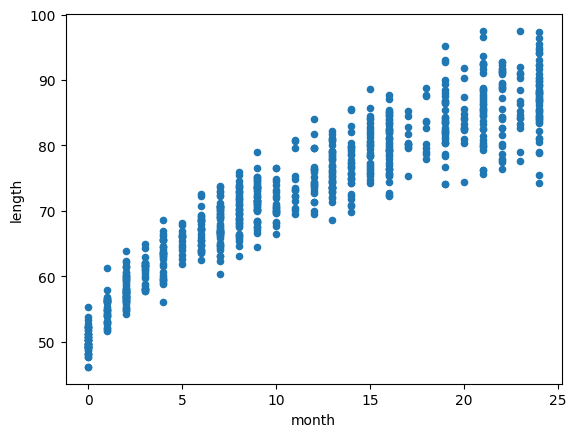

In [6]:
howell_data = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/babies.csv'
#I could have put the url string directly into pd.read_csv()
howell_data = pd.read_csv(howell_data)
howell_data.plot.scatter('month','length')

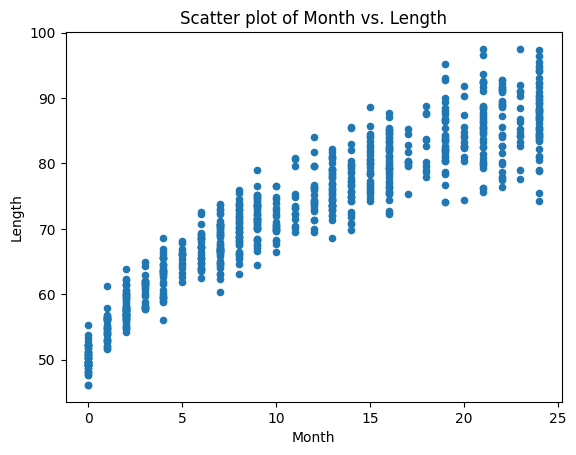

Output()

Output()

In [23]:

# Step 1: Load the data
howell_data = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/babies.csv'
df = pd.read_csv(howell_data)

# Step 2: Visualize the data (scatter plot of month vs length)
df.plot.scatter(x='month', y='length')
plt.title('Scatter plot of Month vs. Length')
plt.xlabel('Month')
plt.ylabel('Length')
plt.show()

# Step 3: Fit a Bayesian model using Bambi with B-splines
# We'll model length as a function of month using cubic B-splines
model = bmb.Model("length ~ bs(month, 3)", data=df)

# Step 4: Fit the model using MCMC sampling
trace = model.fit(draws=2000, tune=1000)


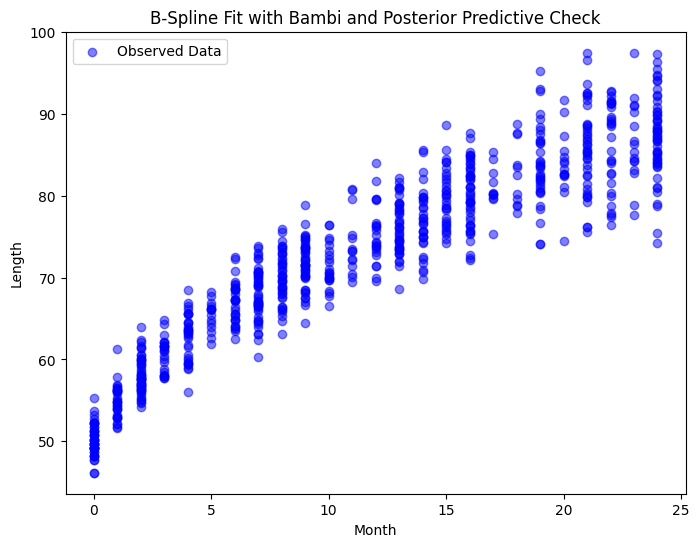

In [31]:
# Step 5: Posterior Predictive Check (PPC)
# Instead of using az.from_pymc3() directly, we can sample posterior predictions.
posterior_predictive = az.extract(trace)
plt.figure(figsize=(8, 6))
plt.scatter(df['month'], df['length'], color='blue', alpha=0.5, label='Observed Data')
plt.xlabel('Month')
plt.ylabel('Length')
plt.title('B-Spline Fit with Bambi and Posterior Predictive Check')
plt.legend()
plt.show()

Using b spline to better capture the relationship between month and length

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

We didn’t specify a mean function in our model, so we’ve assumed that our GP has a mean of zero. This means that as we forecast into the future, the function will eventually return to zero

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I really liked the predictions graph, you could clearly see the two peaks in temperature